# English Premier League Data Exploration (Seasons 19/20 & 20/21)
## by Yaw Poku Gyabaah

## Introduction
> This data set explores whether the abscence of fans from stadiums during the covid period had any impact on match results for english premier league matches played during the 2019/2020 and 2020/2021 seasons.

  



## Preliminary Wrangling


In [223]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_rows', None)

In [42]:
# Loading datasets for the two seasons into a pandas dataframe
epl_2019_20=pd.read_csv(r'C:\Users\gyabaah.poku\OneDrive - Vodafone Group\VDF Project\PY\Udacity Data Science\English Premier League Database\2019-20.csv')
epl_2020_21=pd.read_csv(r'C:\Users\gyabaah.poku\OneDrive - Vodafone Group\VDF Project\PY\Udacity Data Science\English Premier League Database\2020-21.csv')


In [45]:
# Adding another column to show which season any specific row of data belongs to
epl_2019_20.loc[:, 'season'] = '19_20'
epl_2020_21.loc[:, 'season'] = '20_21'

In [46]:
# Merging the two sheets to form one dataset stored in a pandas dataframe named epl_data
epl_data = pd.concat([epl_2019_20,epl_2020_21])


In [47]:
epl_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99,19_20
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92,19_20
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92,19_20
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02,19_20
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93,19_20


In [71]:
# Confirming that the dataset qualifies for use for this project y having more than 600 rows
len(epl_data)

760

In [72]:
epl_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 379
Data columns (total 111 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Div         760 non-null    object 
 1    Date        760 non-null    object 
 2    Time        760 non-null    object 
 3    HomeTeam    760 non-null    object 
 4    AwayTeam    760 non-null    object 
 5    FTHG        760 non-null    int64  
 6    FTAG        760 non-null    int64  
 7    FTR         760 non-null    object 
 8    HTHG        760 non-null    int64  
 9    HTAG        760 non-null    int64  
 10   HTR         760 non-null    object 
 11   Attendance  760 non-null    object 
 12   Referee     760 non-null    object 
 13   HS          760 non-null    int64  
 14   AS          760 non-null    int64  
 15   HST         760 non-null    int64  
 16   AST         760 non-null    int64  
 17   HF          760 non-null    int64  
 18   AF          760 non-null    int64  
 19   HC    

### What is the structure of your dataset?

> My dataset contains match and results statistics for 760 english premier league matches played during the 2019-2020 and 2020-2021 seasons. These individual matches are qualified with 107 variables. There are a number of numeric variables that describe goals scored by half-time, goals scored by full-time, goals scored by away team, goals scored by home team as well as betting odds before the game. There also are a number of nominal variables like Full-time match results and half-time match results. 

### What is/are the main feature(s) of interest in your dataset?

> I am most interested in what match statistics are best for determining how the closure of stadiums to fans impacted home advantage

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the biggest effect of fans or no fans at stadiums will be seen in goals scored by the home team as well as full time result for the home team

## Univariate Exploration

#### I will start by merging the sheets for the two seasons to get one worksheet which i will name epl_data

In [51]:
epl_data.loc[:, 'TG'] = epl_data.FTHG + epl_data.FTAG
epl_data.loc[:, 'THTG'] = epl_data.HTHG + epl_data.HTAG
epl_data.loc[:, 'SHG'] = epl_data.TG - epl_data.THTG

In [53]:
epl_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA,season,TG,THTG,SHG
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,1.94,1.98,1.99,2.07,1.90,1.99,19_20,5,4,1
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,1.96,1.97,2.07,1.98,1.97,1.92,19_20,5,1,4
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.98,1.95,2.00,1.96,1.96,1.92,19_20,2,0,2
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.89,2.03,1.90,2.07,1.86,2.02,19_20,3,0,3
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.97,1.96,2.03,2.08,1.96,1.93,19_20,0,0,0


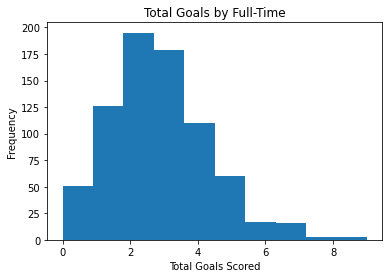

In [68]:
# Standard Scale histogram to show distribution of total goals scored in matches
epl_data.TG.plot(kind='hist')
plt.title(label='Total Goals by Full-Time')
plt.xlabel('Total Goals Scored')
plt.show()

###### The above histogram shows that most matches featured a total of 2 to 3 goals. Matches with more than 5 goals scored were very scarce.

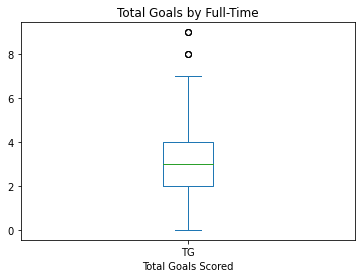

In [319]:
#  Using a box plot to check outliers in total goals scored in matches
epl_data.TG.plot(kind='box')
plt.title(label='Total Goals by Full-Time')
plt.xlabel('Total Goals Scored')
plt.show()

###### The above boxplot complements the earlier histogram perfectly and also confirms that matches with more than 6 goals scored were mostly outliers.

<AxesSubplot:title={'center':'FTHG'}, xlabel='FTR'>

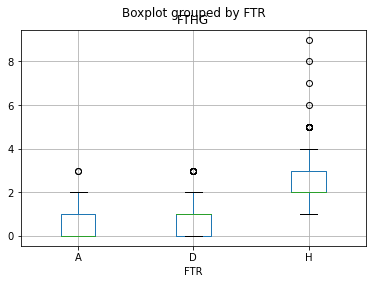

In [322]:
epl_data.boxplot(by='FTR', column='FTHG')

##### Further exploration with boxplot shows that for games won by the home team, the home team mostly scored between 2 and 4 goals, however for drawn games or games won by the away team, the home team usually scored no goal or just one goal.

<AxesSubplot:title={'center':'TG'}, xlabel='FTR'>

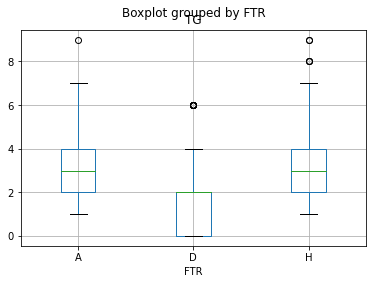

In [325]:
epl_data.boxplot(by='FTR', column='TG')

##### Further exploration with boxplot shows that for games won by the home team, total goals scored by both team was usually between 2 and 4 goals. The same was apparent for games won by the away team.However drawn games, total goals scored by both teams was usally between 0 to 2.

<AxesSubplot:title={'center':'FTHG'}, xlabel='Attendance'>

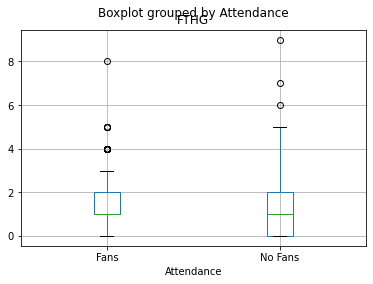

In [323]:
epl_data.boxplot(by='Attendance', column='FTHG')


##### Checking impact of fan prescence at home games,  it was observed from the above box plot that when fans were allowed in stadiums, the home team almost always scored a goal at least. However, there were more cases of the home team not scoring at all when fans were not allowed in stadiums during the covid restrictions.

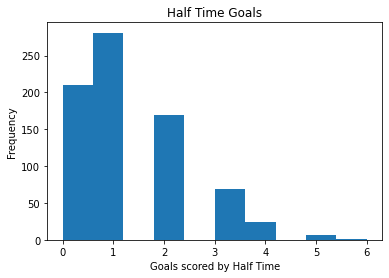

In [67]:
epl_data.THTG.plot(kind='hist')
plt.title(label='Half Time Goals')
plt.xlabel('Goals scored by Half Time')
plt.show()

In [56]:
first_half_goals = epl_data.THTG.sum()
second_half_goals = epl_data.SHG.sum()
a  =[first_half_goals, second_half_goals]

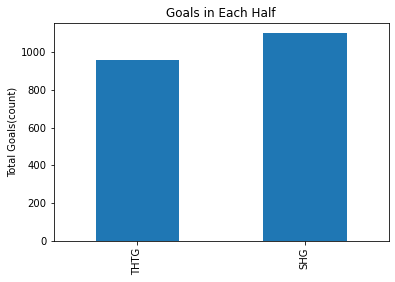

In [60]:
epl_data[['THTG', 'SHG']].sum().plot(kind='bar')
plt.ylabel('Total Goals(count)')
plt.title(label='Goals in Each Half')
plt.show()

##### The two plots above are just exploratory plots on how goals were distributed between the two halves of matches. The half-time goals plot shows that most matches usually only featured just no goals or a goal by halftime. The Goals in each half plot shows that more goals were scored in second halves of games than the first halves.

## Bivariate Exploration


In [75]:
# Dropping some columns that we will not use for any further analysis from the epl_data sheet.
[i for i in epl_data.columns]

['Div',
 'Date',
 'Time',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'FTR',
 'HTHG',
 'HTAG',
 'HTR',
 'Attendance',
 'Referee',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxC

In [76]:
epl_data.drop(columns=['HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'MaxH',
 'MaxD',
 'MaxA',
 'AvgH',
 'AvgD',
 'AvgA',
 'B365>2.5',
 'B365<2.5',
 'P>2.5',
 'P<2.5',
 'Max>2.5',
 'Max<2.5',
 'Avg>2.5',
 'Avg<2.5',
 'AHh',
 'B365AHH',
 'B365AHA',
 'PAHH',
 'PAHA',
 'MaxAHH',
 'MaxAHA',
 'AvgAHH',
 'AvgAHA',
 'B365CH',
 'B365CD',
 'B365CA',
 'BWCH',
 'BWCD',
 'BWCA',
 'IWCH',
 'IWCD',
 'IWCA',
 'PSCH',
 'PSCD',
 'PSCA',
 'WHCH',
 'WHCD',
 'WHCA',
 'VCCH',
 'VCCD',
 'VCCA',
 'MaxCH',
 'MaxCD',
 'MaxCA',
 'AvgCH',
 'AvgCD',
 'AvgCA',
 'B365C>2.5',
 'B365C<2.5',
 'PC>2.5',
 'PC<2.5',
 'MaxC>2.5',
 'MaxC<2.5',
 'AvgC>2.5',
 'AvgC<2.5',
 'AHCh',
 'B365CAHH',
 'B365CAHA',
 'PCAHH',
 'PCAHA',
 'MaxCAHH',
 'MaxCAHA',
 'AvgCAHH',
 'AvgCAHA'], inplace=True)

In [79]:
epl_data.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Attendance,Referee,season,TG,THTG,SHG
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,H,Fans,M Oliver,19_20,5,4,1
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,A,Fans,M Dean,19_20,5,1,4
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,D,Fans,K Friend,19_20,2,0,2
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,D,Fans,G Scott,19_20,3,0,3
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,D,Fans,J Moss,19_20,0,0,0


<AxesSubplot:ylabel='Attendance'>

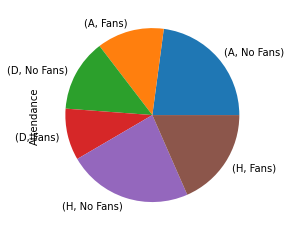

In [106]:
epl_data.groupby(['FTR'])['Attendance'].value_counts().plot(kind='pie')

In [182]:
# Creating variables to show win rates for matches with fans and matches with no fans
matches_with_fans = epl_data[epl_data['Attendance']=='Fans']['FTR'].value_counts()/len(epl_data[epl_data['Attendance']=='Fans']['Attendance'])*100
matches_with_no_fans = epl_data[epl_data['Attendance']!='Fans']['FTR'].value_counts()/len(epl_data[epl_data['Attendance']!='Fans']['Attendance'])*100

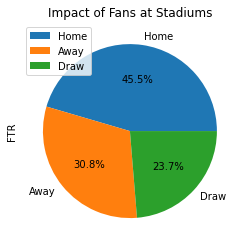

In [192]:
# Plotting a pie chart to show percentage win for matches with fans at stadiums

pd.DataFrame(matches_with_fans).plot(kind='pie', subplots=True, labels=['Home', 'Away', 'Draw'],autopct='%1.1f%%')
plt.title(label='Impact of Fans at Stadiums')
plt.legend(loc='upper left')
plt.show()



##### For matches with fans allowed at the stadiums, the home team won 45.5%, away team won 30.8% and 23% ended in draws.

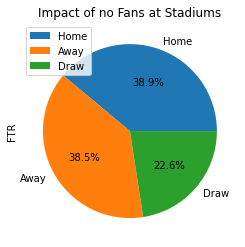

In [326]:
# Plotting a pie chart to show percentage win for matches with no fans at stadiums

pd.DataFrame(matches_with_no_fans).plot(kind='pie', subplots=True, labels=['Home', 'Away', 'Draw'],autopct='%1.1f%%')
plt.title(label='Impact of no Fans at Stadiums')
plt.legend(loc='upper left')
plt.show()

##### For matches with no fans allowed at the stadium, Home team won 38.9% , Away team won 38.5% and 22.6% ended in draws. This virtually means that the concept of home advantage was wiped away with no fans at the stadium and both home and away team had an almost equal chance of winning games where fans were not allowed in stadiums

In [151]:
# Grouping full time results by fan attendance

pd.DataFrame(epl_data.groupby(['Attendance', 'FTR'])['FTR'].count())

FTR
Attendance FTR     
Fans       A     95
           D     73
           H    140
No Fans    A    174
           D    102
           H    176

<AxesSubplot:xlabel='FTR,Attendance'>

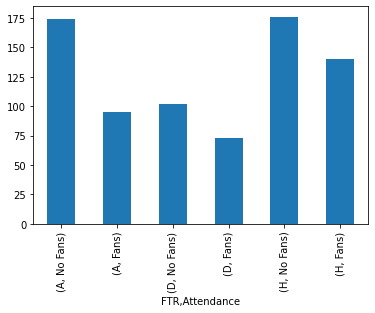

In [103]:
#epl_data[(epl_data['Attendance']=='Fans') & (epl_data['FTR']=='H')]
epl_data.groupby(['FTR'])['Attendance'].value_counts().plot(kind='bar')

#### Now that we have confirmed that the absence of fans from stadiums virtually wiped out the concept of home advantage, we want to further check the impact on specific teams known to have very noisy fans and who rely a lot on the atmosphere created by fans during home matches

In [246]:
# Grouping data by specific home teams
a=epl_data.groupby(['HomeTeam'])

In [258]:
# Checking impact of absence of fans on Liverpool

epl_data[(epl_data['HomeTeam']=='Liverpool')][['Attendance', 'FTR']].value_counts()

Attendance  FTR
Fans        H      16
No Fans     H      12
            A       6
            D       4
dtype: int64

In [277]:
# Finding win percentages for Liverpool home games without fans and with fans

home_matches_with_fans = epl_data[(epl_data['HomeTeam']=='Liverpool') & (epl_data['Attendance']=='Fans')][['Attendance', 'FTR']].value_counts()
home_matches_without_fans = epl_data[(epl_data['HomeTeam']=='Liverpool') & (epl_data['Attendance']!='Fans')][['Attendance', 'FTR']].value_counts()

In [294]:
([home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum(), 
         home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()])

[Attendance  FTR
 Fans        H      1.0
 dtype: float64,
 Attendance  FTR
 No Fans     H      0.545455
 dtype: float64]

In [316]:
tre = pd.DataFrame(home_matches_with_fans[np.in1d(home_matches_with_fans.index.get_level_values(1), ['H'])]/home_matches_with_fans.sum()*100)

In [317]:
tre2 = pd.DataFrame(home_matches_without_fans[np.in1d(home_matches_without_fans.index.get_level_values(1), ['H'])]/home_matches_without_fans.sum()*100)

<AxesSubplot:xlabel='Attendance,FTR'>

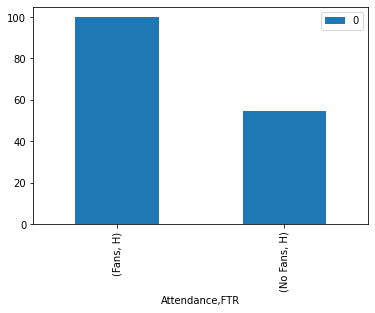

In [318]:
# Plotting win percentages of Liverpool home games with fans and without fans on a bar chart

pd.concat([tre, tre2]).plot(kind='bar')

#### It can be clearly seem from the above plot that Liverpool won all games played at their home ground when fans were allowed into stadiums. However, they only won 54% of their home matches with no fans allowed at their home ground "Anfield"

In [238]:
pd.DataFrame(epl_data.groupby(['HomeTeam', 'Attendance'])['FTR'].value_counts()).reset_index

<bound method DataFrame.reset_index of                                  FTR
HomeTeam         Attendance FTR     
Arsenal          Fans       H      8
                            D      5
                            A      3
                 No Fans    H     10
                            A      7
                            D      5
Aston Villa      Fans       A      6
                            H      6
                            D      2
                 No Fans    A     11
                            H      8
                            D      5
Bournemouth      Fans       A      5
                            D      5
                            H      4
                 No Fans    A      3
                            D      1
                            H      1
Brighton         Fans       D      6
                            H      5
                            A      4
                 No Fans    D     10
                            A      9
                            H      4

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In my investigation of impact of no fans at stadiums on home advantage, i observed that fan absence had a huge negative impact on almost every positive result metric for the home team. Home teams generally scored fewer goals and had fewer wins with no fans than when fans were allowed in stadiums

### Were there any interesting or surprising interactions between features?

> Even though i expecetd that home advantage would be impacted by absence of fans, it was still surprising to how much a team like Liverpool was impacted by the ban of fans from Stadiums. The fact that their win rate without fans dropped to 54% from a 100% win rate with fans was astonishing.

## Conclusions
>It is very clear that absence of fans had a huge impact on home advantage. From the above trends, absence of fans virtually wiped out home advantage and gave the away team an almost equal chance of winning games.
